![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
netflix_df=pd.read_csv("./netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [10]:
# filtter data to remove the Tv Shows
netflix_subset=netflix_df[netflix_df["type"]=="Movie"]
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [12]:
netflix_movies=netflix_subset[["title","country","genre","release_year","duration"]]
netflix_movies

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
7781,Zoom,United States,Children,2006,88
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


In [18]:
# Moviess with shorter time than 60 min

short_movies=netflix_movies[netflix_movies["duration"]<60]
short_movies.sort_values(by="release_year").tail(20)

,title,country,genre,release_year,duration
6633,The Magic School Bus Rides Again The Frizz Con...,Canada,Children,2020,46
3189,Jo Koy: In His Elements,United States,Stand-Up,2020,55
4176,Money Heist: The Phenomenon,Spain,Documentaries,2020,57
2939,If Anything Happens I Love You,United States,Dramas,2020,13
6702,The Netflix Afterparty: The Best Shows of The ...,United States,Comedies,2020,59
5233,"Rob Schneider: Asian Momma, Mexican Kids",United States,Stand-Up,2020,44
3211,John Was Trying to Contact Aliens,United States,Documentaries,2020,17
1327,Chico Bon Bon and the Very Berry Holiday,NaN,Children,2020,25
2664,Hazel Brugger: Tropical,Germany,Stand-Up,2020,58
1203,Canvas,United States,Children,2020,9


In [30]:
colors=[]
for index,row in netflix_movies.iterrows():
    # print(index)
    # print(row)
    if row["genre"]=="Children":
        colors.append("red")
    elif row["genre"]=="Documentaries":
        colors.append("Yellow")
    elif row["genre"]=="Stand-Up":
        colors.append("Black")
    else:
        colors.append("Blue")


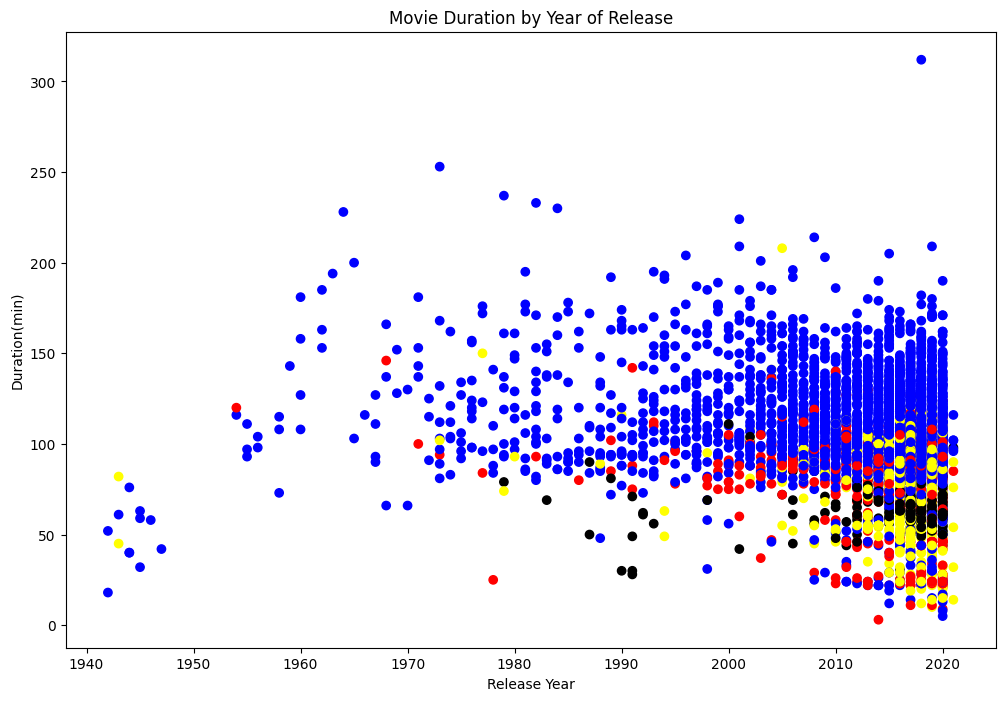

In [35]:
fig=plt.figure(figsize=(12,8))
plt.scatter(netflix_movies["release_year"],netflix_movies["duration"],c=colors)
plt.xlabel("Release Year")
plt.ylabel("Duration(min)")
plt.title("Movie Duration by Year of Release")
plt.show()

### Answer
>"It is uncertain to state whether the movie time is getting shorter if we just check all the genre together"*